# Описание проекта
Вместе с отделом маркетинга крупного интернет-магазина мы подготовили список гипотез для увеличения выручки.
Необходимо выполнить приоритизацию гипотез, запустить A/B-тест и проанализировать результаты.

# Доступные данные:
В нашем распоряжении имеются следующие данные:
- список гипотез,
- список заказов,
- список посетителей.

# Цели проекта:
- Выполнить приоритизацию гипотез,
- Выполнить анализ проведенного A/B теста.

# Содержание

1. Изучение и подготовка данных из файлов
2. Приоритизация гипотез  
    2.1. Общие выводы по разделу
3. Анализ A/B-теста  
    3.1. График кумулятивной выручки по группам  
    3.2. График кумулятивного среднего чека по группам  
    3.3. График относительного изменения кумулятивного среднего чека  
    3.4. График кумулятивной конверсии по группам  
    3.5. График относительного изменения кумулятивной конверсии  
    3.6. Точечный график количества заказов по пользователям  
    3.7. 95-й и 99-й перцентили количества заказов на пользователя  
    3.8. Точечный график стоимостей заказов  
    3.9. 95-й и 99-й перцентили стоимости заказов  
    3.10. Статистическая значимость различий в конверсии между группами по «сырым» данным  
    3.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным  
    3.12. Статистическая значимость различий в конверсии между группами по «очищенным» данным  
    3.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным  
    3.14. Решение по результатам теста и его обоснование  
    3.15. Общие выводы по разделу  

# 1. Изучение и подготовка данных из файлов <a class="anchor" id="first-bullet"></a>

Импортируем библиотеки:

In [1]:
import pandas as pd
from collections import Counter
import numpy as np
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy import stats as st
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', -1)

Открываем файлы:

In [2]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

**Предпросмотр файла `hypothesis`:**

In [3]:
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Сразу приведем названия столбцов к нижнему регистру:

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
print(hypothesis['hypothesis'].unique())

['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
 'Запустить собственную службу доставки, что сократит срок доставки заказов'
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар'
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов'
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
 'Запустить акцию, дающую скидку на товар в день рождения']


Отдельно на дубликаты можно не проверять, т.к. по результатам визуальной проверки уже заметно их отсутствие.

**Промежуточные выводы:**
- данные однородны, пропусков и дубликатов нет;
- необходимо `привести названия столбцов к нижнему регистру` - выполнено.

**Предпросмотр файла `orders`:**

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Проверим минимальные / максимальные значения выручки:

Метод describe:

In [9]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

In [10]:
print(orders['revenue'].min())
print(orders['revenue'].max())

50
1294500


Проверим названия групп на уникальность:

In [11]:
print(orders['group'].unique())

['B' 'A']


Проверка на дубликаты:

In [12]:
duplicates = orders[orders.duplicated(keep='last')]
print(duplicates)

Empty DataFrame
Columns: [transactionId, visitorId, date, revenue, group]
Index: []


**Промежуточные выводы:**
- данные однородны, пропусков и дубликатов нет;
- необходимо формат столбца `date` к datetime;
- заметны очень выдающиеся и различающиемся значения выручки, в частности, максимальное значение - 1294500, минимальное 50. Вполне вероятно, что имеются выбросы. Подробную проверку выполним позднее.

**Предпросмотр файла `visitors`:**

In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Проверим названия групп на уникальность:

In [15]:
print(visitors['group'].unique())

['A' 'B']


Проверка на дубликаты:

In [16]:
duplicates = visitors[visitors.duplicated(keep='last')]
print(duplicates)

Empty DataFrame
Columns: [date, group, visitors]
Index: []


**Промежуточные выводы:**
- данные однородны, пропусков и дубликатов нет;
- необходимо формат столбца `date` к datetime.

**1.1. Общие выводы по разделу:**
- в целом набор данных подготовлен корректно, пропущенных значений и дубликатов нет;
- необходимо привести названия столбцов таблицы hypothesis к нижнему регистру;
- необходимо перевести даты в соответствующий формат (будет выполнено на этапе расчета метрик).

# 2. Приоритизация гипотез <a class="anchor" id="second-bullet"></a>

**Задачи:**
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

In [17]:
hypothesis.head(1)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6


В файле hypothesis содержится 9 гипотез. Выведем их:

In [18]:
for li in hypothesis['hypothesis'].unique():
    print(li)

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Запустить собственную службу доставки, что сократит срок доставки заказов
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Запустить акцию, дающую скидку на товар в день рождения


Пронумеруем гипотезы:

In [19]:
hypothesis['id'] = [i+1 for i,row in hypothesis.iterrows()]
hypothesis.set_index(['id'], inplace=True)
hypothesis.head(10)

,hypothesis,reach,impact,confidence,efforts
id,,,,,
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Применим фреймворк `ICE`:**

Выведем переменную ICE в соответствующем столбце:

In [20]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                                                                                      hypothesis  \
id                                                                                                                 
9   Запустить акцию, дающую скидку на товар в день рождения                                                        
1   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
8   Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
7   Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
3   Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
2   Запустить собственную службу доставки, что сократит срок доставки заказов                                      
6   Добавить страницу отзывов клиентов о магазине, что позволит увеличит

`Самая перспективная гипотеза - 9, следом за ней идут 1 и 8.`

**Применим фреймворк `RICE`:**

Выведем переменную RICE в соответствующем столбце:

In [21]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                                                                                      hypothesis  \
id                                                                                                                 
8   Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
3   Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
7   Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
9   Запустить акцию, дающую скидку на товар в день рождения                                                        
4   Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
2   Запустить собственную службу доставки, что сократит срок доставки за

`Самая перспективная гипотеза - 8, следом за ней идёт гипотеза 3 и третье место делят гипотезы 1 и 7.`

Результат с использованием фреймворка RICE ожидаем: параметр охвата reach у гипотезы 8 составляет целых 10 баллов проти1 балла у гипотезы 9.

**2.1. Общие выводы по разделу:**
- мы применили фреймворки ICE / RICE для приоритизации гипотез;
- в соответствии с ICE cамая перспективная гипотеза - 9, следом за ней идут 1 и 8;
- в соответствии с RICE cамая перспективная гипотеза - 8, следом за ней идёт гипотеза 3 и третье место делят гипотезы 1 и 7;
- различия в приоритизации вызваны фактором Reach, который составляет 10 баллов для гипотезы 8, т.е. охват максимален. Гипотеза 9 имеет охват минимальный, всего 1 балл.

# 3. Анализ A/B-теста <a class="anchor" id="third-bullet"></a>

Результаты A/B-теста представлены в файлах orders и visitors. Откроем их, они уже подготовлены:

In [22]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [23]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### 3.1. График кумулятивной выручки по группам <a class="anchor" id="third-one-bullet"></a>

Изменим формат данных дат:

In [24]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
    
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():

In [25]:
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах:
- получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups;
- агрегируем значения: вычислим максимальную дату, группу, число уникальных ID заказов и пользователе, подсчитаем сумму средних чеков;
- отсортируем результаты по столбцам 'date' и 'group':

In [26]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                    orders['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'transactionId' : pd.Series.nunique,
        'visitorId' : pd.Series.nunique,
        'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Так же получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [27]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], 
        visitors['group'] == x['group'])].agg({
        'date' : 'max', 
        'group' : 'max', 
        'visitors' : 'sum'}),axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одну с понятными названиями столбцов:

In [28]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


Построим график кумулятивной выручки по дням и группам A/B-тестирования:

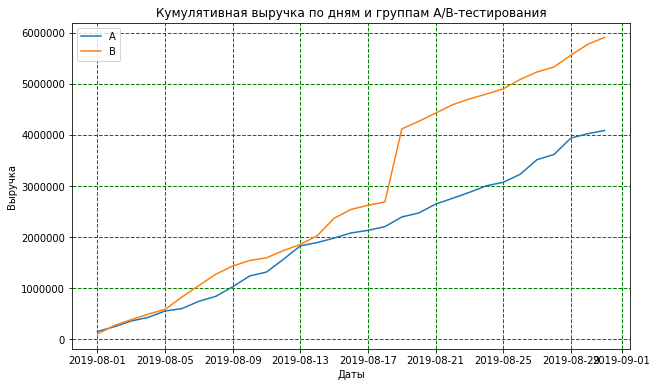

In [29]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Даты')
plt.ylabel('Выручка')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.legend()
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.show();

**Согласно графику, выручка увеличивается с течением времени, причем для группы А она растет более равномерно, а у группы В наблюдается резкий всплеск, обусловленный либо количеством заказов либо крупной суммой заказов.**

### 3.2. График кумулятивного среднего чека по группам <a class="anchor" id="third-two-bullet"></a>

Построим графики среднего чека по группам. Для этого разделим кумулятивную выручку на кумулятивное число заказов:

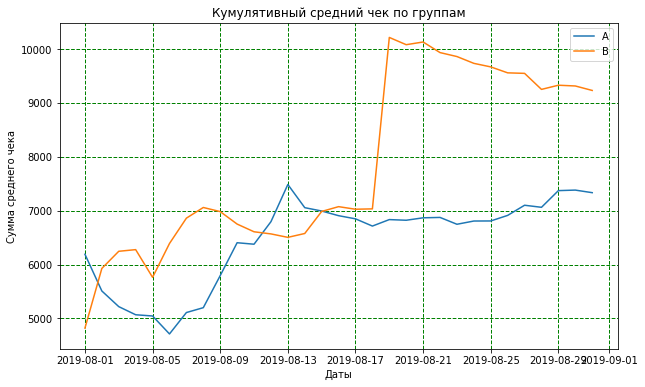

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Даты')
plt.ylabel('Сумма среднего чека')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.legend()
plt.title('Кумулятивный средний чек по группам')
plt.show();

**Средний чек довольно равномерен для группы А примерно с середины теста; мы опять наблюдаем всплеск для группы В, причем он еще более выражен, а также снижение среднего чека в конце теста для группы В.**

### 3.3. График относительного изменения кумулятивного среднего чека <a class="anchor" id="third-three-bullet"></a>

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline():

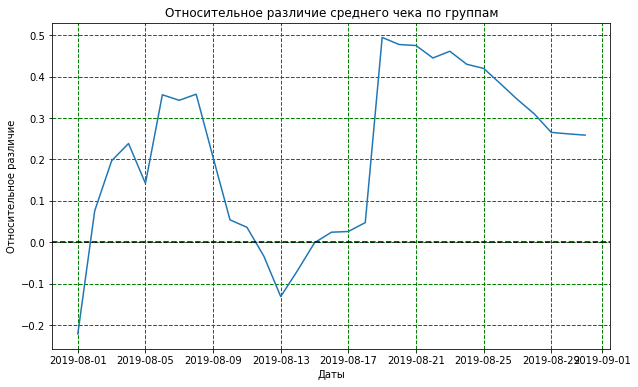

In [31]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 6))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Даты')
plt.ylabel('Относительное различие')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.title('Относительное различие среднего чека по группам')
plt.show();

**Мы видим довольно скачкообразные различия между группами. Возможно, это объясняется наличием выбросов.**

### 3.4. График кумулятивной конверсии по группам <a class="anchor" id="third-four-bullet"></a>

Для построения графика кумулятивной конверсии зададим масштаб осей методом plt.axis(). Проверим максимальные и минимальные значения:

In [32]:
print(mergedCumulativeRevenue['date'].min())
print(mergedCumulativeRevenue['date'].max())
print(mergedCumulativeRevenue['date'].min())
print(mergedCumulativeRevenue['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00
2019-08-01 00:00:00
2019-08-31 00:00:00


Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — ["2019-08-01", '2019-08-31', -0.2, 0.05]:

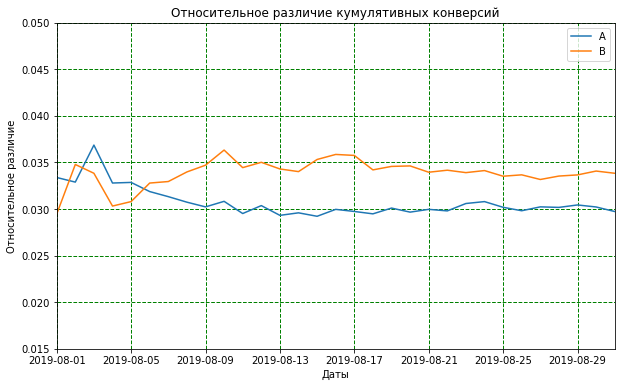

In [33]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.015, 0.05])


plt.xlabel('Даты')
plt.ylabel('Относительное различие')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.title('Относительное различие кумулятивных конверсий')
plt.show();

**Как мы видим, конверсии групп почти синхронны. На определенном этапе конверсия группы В обгоняет группу А, а конверсия группы А падает, но потом конверсии зафиксировались на определенных уровнях.**

### 3.5. График относительного изменения кумулятивной конверсии <a class="anchor" id="third-five-bullet"></a>

Построим график относительного различия кумулятивных конверсий:

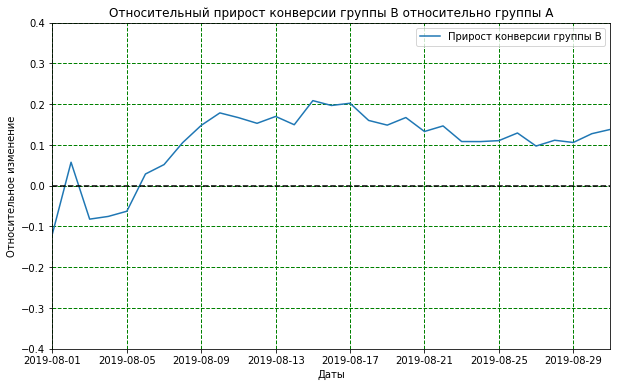

In [34]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])
plt.figure(figsize=(10, 6))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Прирост конверсии группы В")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31',-0.4, 0.4])

plt.xlabel('Даты')
plt.ylabel('Относительное изменение')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.show();

**Как видим, на протяжении большей части срока за исключением начальной недели, конверсия группы В выше, чем группы А.**

### 3.6. Точечный график количества заказов по пользователям <a class="anchor" id="third-six-bullet"></a>

Для построения графика подготовим таблицу:

In [35]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


Как видим, некоторые пользователи размещали несколько заказов. Построим график:

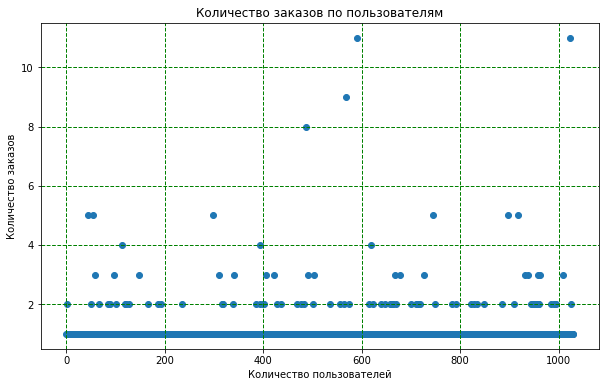

In [36]:
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, ordersByUsers['orders'])

plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.title('Количество заказов по пользователям')
plt.show();

**Из графика видно, что подавляющее количество пользователей размещают один заказ, но количество заказов от 2 до 5 также подчинено определенной системе, и мы не можем однозначно утверждать, что это выбросы. Зато можно отметить как выбросы количество заказов от 8 и выше.**

### 3.7. 95-й и 99-й перцентили количества заказов на пользователя <a class="anchor" id="third-seven-bullet"></a>

Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [37]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


**Как видим, не более 5% разместили более 2 заказов, и не более 1% разместили более 4 заказов. `Выберем 2 заказа как границу для определения аномальных пользователей.`**

### 3.8. Точечный график стоимостей заказов <a class="anchor" id="third-eight-bullet"></a>

Оценим стоимость заказов при помощи графика:

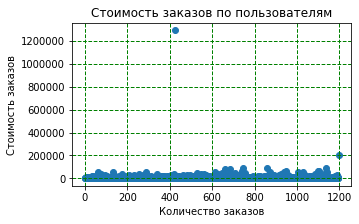

In [38]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(5, 3))
plt.scatter(x_values, orders['revenue'])

plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказов')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.title('Стоимость заказов по пользователям')
plt.show();

Как видим, стоимость подавляющего большинства заказов не превышает 100 тыс рублей, при этом заметны явные выбросы на отметке 200 тыс рублей и свыше 1,2 млн рублей. Ограничим диапазон значений по стоимости заказа суммой в 100 тыс рублей:

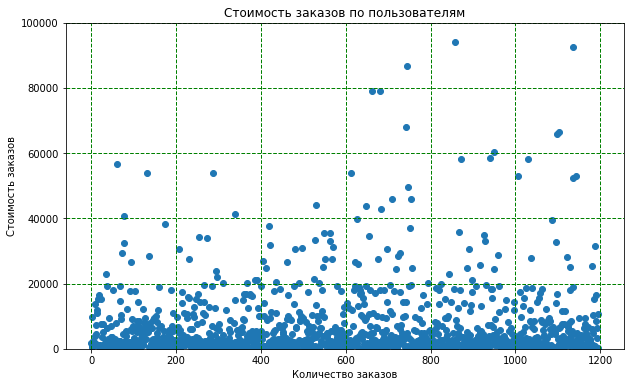

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0,100000)
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказов')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.title('Стоимость заказов по пользователям')
plt.show();

**Теперь заметно, что подавляющее количество заказов укладывается в сумму 20000 рублей. Все, что выше - выбросы. Проверим этот порог по перцентилям.**

### 3.9. 95-й и 99-й перцентили стоимости заказов <a class="anchor" id="third-nine-bullet"></a>

Посчитаем выборочные перцентили стоимости заказов:

In [40]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Как видим, не более 5% разместили заказы на сумму от 28000, и не более 1% разместили заказы на сумму от 58233. `Исходя из результатов, будет логичным ограничить стоимость заказов порогом в 28000 рублей.`**

### 3.10. Статистическая значимость различий в конверсии между группами по «сырым» данным <a class="anchor" id="third-ten-bullet"></a>

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным — без удаления аномальных пользователей. Сформулируем нулевую и альтернативную гипотезы:
- H0: статистически значимые различия в конверсии между группами по сырым данным отсутствуют, конверсии равны;
- H1: статистически значимые различия в конверсии между группами по сырым данным присутствуют, конверсии не равны.

Уровень статистической значимости примем равным alpha=0.05.

Подготовим данные:

In [41]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [42]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]


ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов:

In [44]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

ordersByUsersB.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.

In [45]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
               name='orders')],axis=0)

Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой:

In [46]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.008
Относительный прирост конверсии группы B: 0.138


- **Значение p-value меньше критерия статистической значимости 0.05, значит, есть основание отвергнуть нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет;**
- **Второе значение показывает прирост в размере 13.8% для конверсии группы В.**

### 3.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным <a class="anchor" id="third-11-bullet"></a>

Сформулируем нулевую и альтернативную гипотезы:
- H0: статистически значимые различия в среднем чеке заказа между группами по сырым данным отсутствуют;
- H1: статистически значимые различия в среднем чеке заказа между группами по сырым данным присутствуют.

Уровень статистической значимости примем равным alpha=0.05.

Найдём относительные различия в среднем чеке между группами:

In [47]:
print('p-value: {0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                       orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие среднего чека группы B к группе А: {0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/
    orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.365
Относительное различие среднего чека группы B к группе А: 0.259


- **P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что средний чек не равен, нет;**
- **В то же время по расчетам на основании сырых данных средний чек группы В почти на треть больше, чем средний чек группы А.**

### 3.12. Статистическая значимость различий в конверсии между группами по «очищенным» данным <a class="anchor" id="third-12-bullet"></a>

Сформулируем нулевую и альтернативную гипотезы:
- H0: статистически значимые различия в конверсии между группами по "очищенным" данным отсутствуют, конверсии равны;
- H1: статистически значимые различия в конверсии между группами по "очищенным" данным присутствуют, конверсии не равны.

Уровень статистической значимости примем равным alpha=0.05.

Напомним, что найденные в прошлых уроках 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28000 рублей. 

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

Узнаем, сколько всего аномальных пользователей методом shape().

In [48]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


**Всего 74 аномальных пользователя.**

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [49]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [50]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B по очищенным данным: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.007
Относительный прирост конверсии группы B по очищенным данным: 0.173


- **Значение p-value значительно меньше критерия статистической значимости, есть основание отвергнуть нулевую гипотезу;** 
- **Второе значение показывает прирост конверсии в размере 17.3% для группы В;**
- **Следует отметить, что результаты данного теста почти не изменились после удаления аномальных данных.**

### 3.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным <a class="anchor" id="third-13-bullet"></a>

Сформулируем нулевую и альтернативную гипотезы:
- H0: статистически значимые различия в среднем чеке заказа между группами по "очищенным" данным отсутствуют;
- H1: статистически значимые различия в среднем чеке заказа между группами по "очищенным" данным присутствуют.

Уровень статистической значимости примем равным alpha=0.05.

Произошло ли что-нибудь с результатами по среднему чеку?

In [51]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное различие среднего чека группы B к группе А по очищенным данным: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.369
Относительное различие среднего чека группы B к группе А по очищенным данным: -0.020


- **Значение p-value больше критерия статистической значимости, и у нас нет оснований отвергать нулевую гипотезу;**
- **Разница в чеке между сегментами теперь заметно снизилась до 2% в пользу группы А. `Разница незначительная;`
- **Это означает, что `большинство аномальных заказов приходились на группу В`. Очистка данных от аномальных пользователей позволила получить более корректную и актуальную информацию.**

### 3.14. Решение по результатам теста и его обоснование <a class="anchor" id="third-14-bullet"></a>

Необходимо построить обновленный график различий по среднему чеку:

In [52]:
#выгрузим копию таблицы orders, где уберем аномальные значения
orders_fix = orders[~orders['visitorId'].isin(abnormalUsers)]

datesGroups = orders_fix[['date','group']].drop_duplicates()

ordersAggregated_fix = datesGroups.apply(
    lambda x: orders_fix[np.logical_and(orders_fix['date'] <= x['date'], 
                                    orders_fix['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'transactionId' : pd.Series.nunique,
        'visitorId' : pd.Series.nunique,
        'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated_fix = visitorsAggregated.copy()

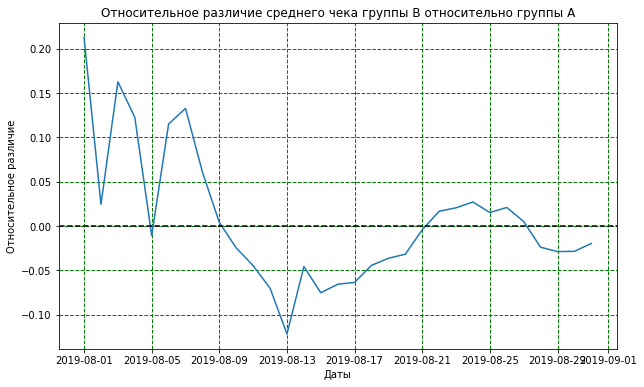

In [53]:
cumulativeData_fix = ordersAggregated_fix.merge(visitorsAggregated_fix, left_on=['date', 'group'], 
                                                right_on=['date', 'group'])
cumulativeData_fix.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA_fix = cumulativeData_fix[cumulativeData_fix['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB_fix = cumulativeData_fix[cumulativeData_fix['group']=='B'][['date','revenue', 'orders']]

# собираем данные в одном датафрейме
mergedCumulativeRevenue_fix = cumulativeRevenueA_fix.merge(
    cumulativeRevenueB_fix, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 6))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue_fix['date'], 
         (mergedCumulativeRevenue_fix['revenueB']/mergedCumulativeRevenue_fix['ordersB'])/(mergedCumulativeRevenue_fix['revenueA']/mergedCumulativeRevenue_fix['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Даты')
plt.ylabel('Относительное различие')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.title('Относительное различие среднего чека группы В относительно группы А')
plt.show();

Также, для напоминания повторно выведем график относительной конверсии:

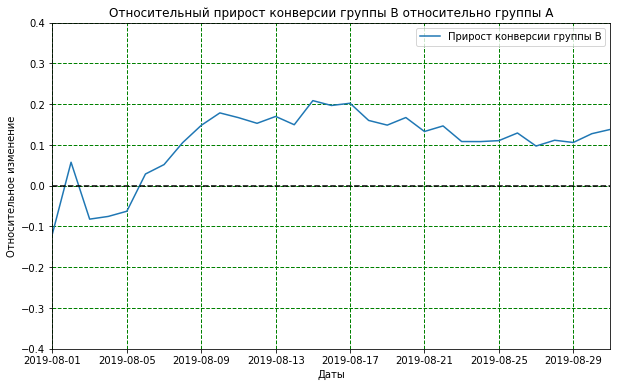

In [54]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])
plt.figure(figsize=(10, 6))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Прирост конверсии группы В")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31',-0.4, 0.4])

plt.xlabel('Даты')
plt.ylabel('Относительное изменение')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.show();

**Выводы**
- **По результатам теста как с сырыми, так и с очищенными данными, есть основания отвергнуть нулевую гипотезу о равенстве конверсий между группами;**
- **График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения;**
- **Что касается среднего чека, по результатам теста как с сырыми, так и с очищенными данными, у нас нет оснований отвергать нулевую гипотезу о равенстве среднего чека между группами;**
- **На основании данных можно сделать вывод о том, что группа В однозначно лидирует по конверсии, а средний чек обеих группа равен. Значит, по результатам теста лидирует группа В.**

**3.15. Общие выводы по разделу:**
- Нами проведен анализ A/B теста. При изучении данных были замечены аномалии, существенно искажающие результаты, поэтоум был произведен отсев аномалий.
- Конверсия группы В выше, чем в группе А, однако средний чек в группах практически равен (2% разницы).
- Рекомендуем на этом завершить тест и признать группу В лидирующей.